Results Section

- Dipole Auger + 2MRS Dipoles in >cz (with flux weight)
- Angular distance to Auger Dipole
- [Use full Sample]
---------------------

- Dipole Auger + 2MRS Dipoles in slices of cz (with flux weight)
- Angular distance to Auger Dipole
- [Use full Sample]
---------------------
- Galaxy-Flux correlation for different cz
- [Use sample with completeness]
---------------------

- G-F correlation at closest cz for different K
- [Use sample with completeness]



### Read Full Catalogue

/tmp/ipykernel_41200/3918434816.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  for chunk in pd.read_csv(


Remaining galaxies after all cuts: 144017
Number of galaxies: 144017
           GLADE_no             RA            Dec              K  \
count  1.440170e+05  144017.000000  144017.000000  144017.000000   
mean   9.009212e+05     170.332474       5.537198      12.443390   
std    7.069175e+05     101.142041      36.865329       1.132563   
min    2.000000e+00       0.003035     -89.647903       5.688000   
25%    7.555700e+04      80.219400     -22.351150      11.727000   
50%    1.066738e+06     167.663284       8.081512      12.551000   
75%    1.206870e+06     247.533737      34.057209      13.333000   
max    2.274090e+07     359.996490      89.607674      15.649000   

             z_helio            d_L             cz            M_K  
count  144017.000000  144017.000000  144017.000000  144017.000000  
mean        0.029313     133.934881    8787.688662     -23.013315  
std         0.009921      45.718878    2974.343303       1.281962  
min         0.004008      12.436755    1201.46

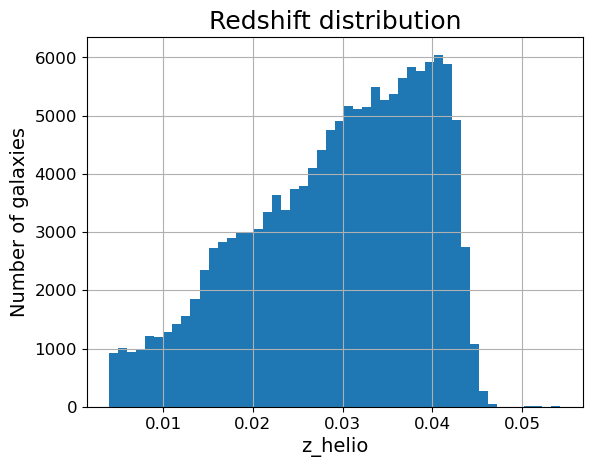

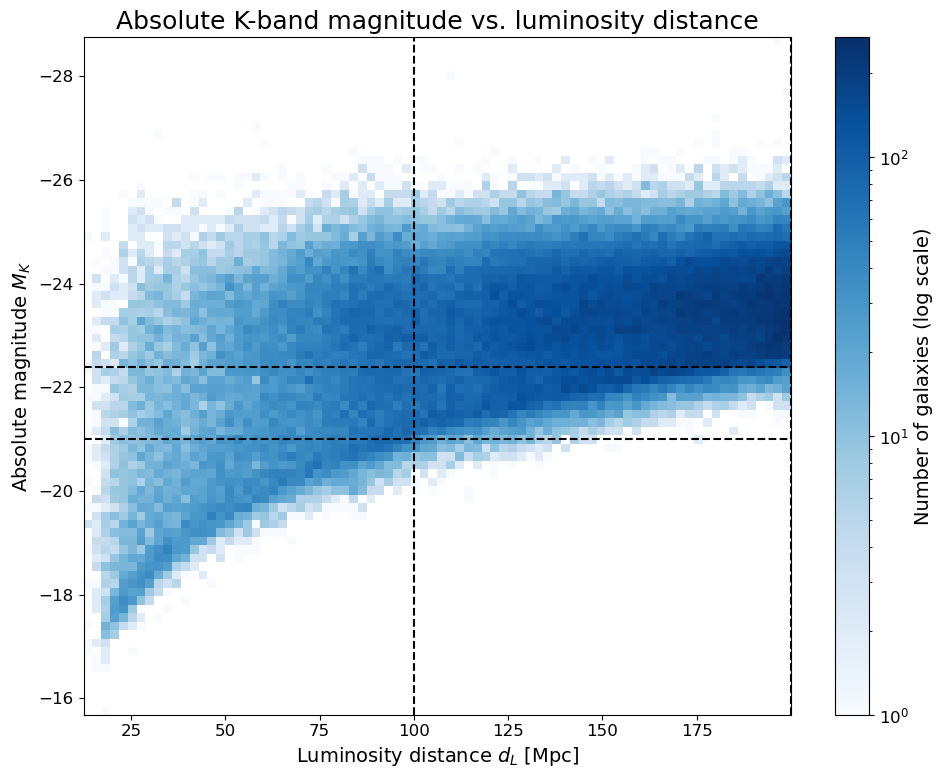

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

filename = "../data/GLADE_zhelio_lt0.1_dL_lt300.txt"
c = 299792.458  # km/s
chunksize = 200_000

cols_to_use = [
    "GLADE_no", "RA", "Dec", "z_helio", "K", "d_L"
]

# Read header
with open(filename, 'r') as f:
    header = f.readline().lstrip('#').split()

cz_min = 1200  # km/s
dL_max = 200   # Mpc

filtered_chunks = []

for chunk in pd.read_csv(
    filename,
    delim_whitespace=True,
    names=header,
    usecols=cols_to_use,
    skiprows=1,
    chunksize=chunksize
):
    # Compute cz
    chunk["cz"] = c * chunk["z_helio"]

    # Apply the main physical filters
    chunk = chunk[(chunk["cz"] > cz_min) & (chunk["d_L"] < dL_max)]

    # Compute absolute K magnitude
    chunk["M_K"] = chunk["K"] - 5 * np.log10(chunk["d_L"]) - 25

    # Apply isfinite mask *inside the loop*
    mask = np.isfinite(chunk["M_K"]) & np.isfinite(chunk["d_L"])
    chunk = chunk.loc[mask]

    # Append filtered data
    filtered_chunks.append(chunk)

# Concatenate everything
df = pd.concat(filtered_chunks, ignore_index=True)
print(f"Remaining galaxies after all cuts: {len(df)}")




# ----------------------------
# INSPECT DATA
# ----------------------------
print("Number of galaxies:", len(df))
print(df.describe())

# ----------------------------
# BASIC PLOTS
# ----------------------------
# Redshift distribution
plt.figure()
df['z_helio'].hist(bins=50)
plt.xlabel("z_helio")
plt.ylabel("Number of galaxies")
plt.title("Redshift distribution")
plt.show()


### Plot K vs cz
from matplotlib.colors import LogNorm

# Compute absolute K magnitude
df["M_K"] = df["K"] - 5 * np.log10(df["d_L"]) - 25

# Plot
plt.figure(figsize=(10, 8))
plt.hist2d(
    df["d_L"],
    df["M_K"],
    bins=80,
    cmap='Blues',
    norm=LogNorm()
)

# Reference lines
plt.axvline(x=100, color='k', linestyle='dashed')
plt.axvline(x=200, color='k', linestyle='dashed')
plt.axhline(-21, color='k', linestyle='dashed')
plt.axhline(-22.4, color='k', linestyle='dashed')

# Labels and style
plt.xlabel("Luminosity distance $d_L$ [Mpc]")
plt.ylabel("Absolute magnitude $M_K$")
plt.title("Absolute K-band magnitude vs. luminosity distance")
plt.gca().invert_yaxis()  # brighter = up

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Number of galaxies (log scale)")

plt.tight_layout()
plt.show()


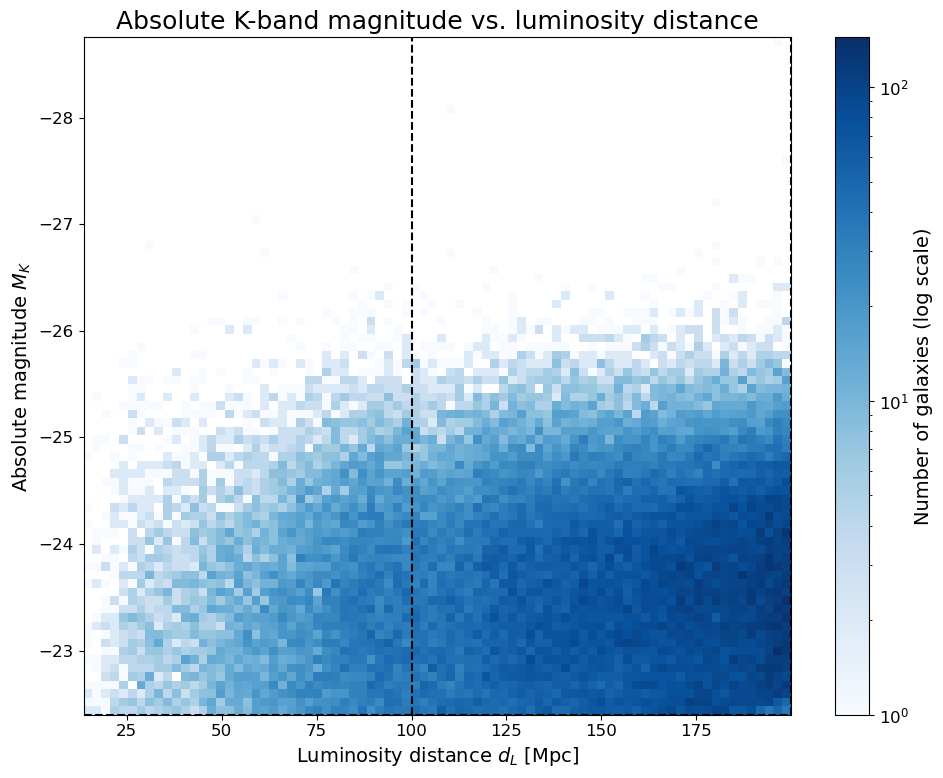

In [17]:
df = df[df["M_K"]<-22.4]

# Plot
plt.figure(figsize=(10, 8))
plt.hist2d(
    df["d_L"],
    df["M_K"],
    bins=80,
    cmap='Blues',
    norm=LogNorm()
)

# Reference lines
plt.axvline(x=100, color='k', linestyle='dashed')
plt.axvline(x=200, color='k', linestyle='dashed')
plt.axhline(-21, color='k', linestyle='dashed')
plt.axhline(-22.4, color='k', linestyle='dashed')

# Labels and style
plt.xlabel("Luminosity distance $d_L$ [Mpc]")
plt.ylabel("Absolute magnitude $M_K$")
plt.title("Absolute K-band magnitude vs. luminosity distance")
plt.gca().invert_yaxis()  # brighter = up

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Number of galaxies (log scale)")

plt.tight_layout()
plt.show()


=== Dipole for Full Sample ===
N = 83981 galaxies
RA = 106.06° ± 4.06° (± 4.82° bootstrapped)
Dec = 47.70° ± 4.06° (± 2.64° bootstrapped)
Amplitude = 0.0547 ± 0.0025
Significance = inf sigma (p = 4.84e-44)
Angular separation from Auger = 71.91° ± 2.67°

=== Dipole for 1000-1500 km/s ===
N = 165 galaxies
RA = 135.90° ± 11.57° (± 14.81° bootstrapped)
Dec = -19.08° ± 11.57° (± 11.59° bootstrapped)
Amplitude = 0.3101 ± 0.0292
Significance = 4.43 sigma (p = 4.76e-06)
Angular separation from Auger = 33.67° ± 14.95°

=== Dipole for 1500-2000 km/s ===
N = 346 galaxies
RA = 152.98° ± 14.23° (± 16.72° bootstrapped)
Dec = -19.65° ± 14.23° (± 11.96° bootstrapped)
Amplitude = 0.2193 ± 0.0385
Significance = 3.43 sigma (p = 3.00e-04)
Angular separation from Auger = 49.09° ± 15.26°

=== Dipole for 2000-2500 km/s ===
N = 406 galaxies
RA = 164.98° ± 6.52° (± 5.65° bootstrapped)
Dec = 1.58° ± 6.52° (± 6.87° bootstrapped)
Amplitude = 0.3298 ± 0.0398
Significance = inf sigma (p = 1.64e-17)
Angular separat

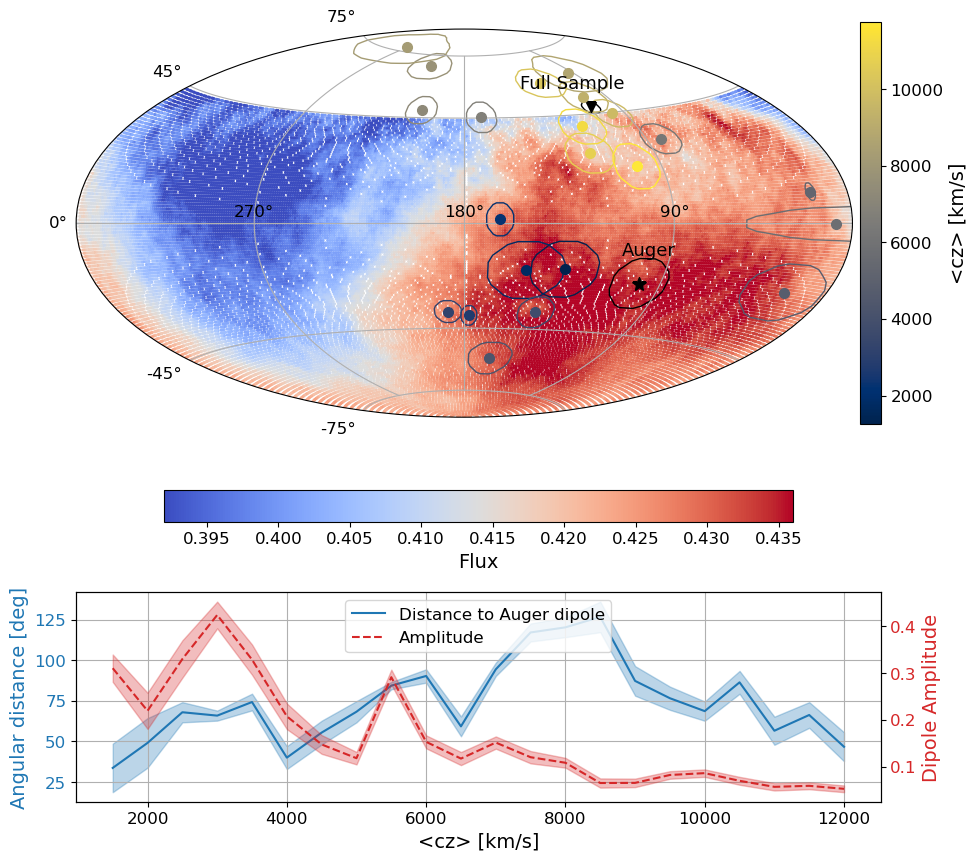

In [18]:
import numpy as np
#from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
#from astropy.table import Table
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable


# === Load GLADE catalogue ===
c = 299792.458  # km/s
if "cz" not in df.columns:
    df["cz"] = c * df["z_helio"]

RA_all = np.deg2rad(df['RA'])
Dec_all = np.deg2rad(df['Dec'])
cz_all = df['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * df['M_K']) # Use K-band Luminosity as weights

# === Load flux cataloge ===
# Load flux data
file_path = "../data/Auger/flux_a8_lb.dat"
flux_cat = np.loadtxt(file_path)

# Columns: Dec, RA, Flux, Flux_unc, Gal_l, Gal_b
flux_dec = flux_cat[:, 0]
flux_ra = flux_cat[:, 1]
flux_val = flux_cat[:, 2]

# Convert to radians
ra_rad = np.radians(flux_ra)
dec_rad = np.radians(flux_dec)

# Shift RA to put RA=0° on right edge, increase leftward
ra_shifted = np.remainder(ra_rad + np.pi, 2 * np.pi)
ra_shifted[ra_shifted > np.pi] -= 2 * np.pi
ra_shifted = -ra_shifted  # flip to increase leftward


# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(cz, cz + 500) for cz in range(1000, 12000, 500)]
cz_bins.insert(0, (1000, 12000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [0.5 * (cz_min + cz_max) for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
cmap = cm.cividis  # or try 'viridis', 'turbo', 'cividis'
#import seaborn as sns
#cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'k' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = np.array(RA_all[mask])
    Dec = np.array(Dec_all[mask])
    weights = np.array(weights_all[mask])

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]


        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")


# === Set up top and bottom subplots ===
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[3, 1])
ax_top = fig.add_subplot(gs[0], projection='hammer')
ax_bottom = fig.add_subplot(gs[1])
ax_top.grid(True)

# === Set fontsizrs ===

plt.rcParams.update({
    'font.size': 14,          # default text size
    'axes.labelsize': 14,     # x/y labels
    'axes.titlesize': 18,     # plot titles
    'xtick.labelsize': 12,    # x tick labels
    'ytick.labelsize': 12,    # y tick labels
    'legend.fontsize': 12     # legend text
})

# === Configure Hammer (Top) Axis ===
xticks_deg = [270, 180, 90]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax_top.set_xticks(xticks_rad)
ax_top.set_xticklabels([f"{d}°" for d in xticks_deg])

yticks_deg = [-75, -45, 0, 45, 75]
yticks_rad = np.radians(yticks_deg)
ax_top.set_yticks(yticks_rad)
ax_top.set_yticklabels([f"{d}°" for d in yticks_deg])

# === Plot flux on sky ===
norm_flux = colors.Normalize(vmin=np.percentile(flux_val, 5), vmax=np.percentile(flux_val, 95))
# === Remove NaNs from flux_val and corresponding positions ===
mask = np.isfinite(flux_val)
ra_shifted = ra_shifted[mask]
dec_rad = np.radians(flux_dec[mask])
flux_val = flux_val[mask]
sc = ax_top.scatter(ra_shifted, dec_rad, c=flux_val, s=5, cmap='coolwarm', norm=norm_flux, edgecolor='none')

# Horizontal colorbar for flux
cbar_flux = fig.colorbar(sc, ax=ax_top, orientation='horizontal', pad=-.1, fraction=0.05)
cbar_flux.set_label("Flux")

# === Plot dipoles ===
for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left
    color = res['color']
    amp = res['d_perp']

    marker = 'o' if label != 'Full Sample' else 'v'
    ax_top.plot(ra_plot, dec_rad, marker, color=color, label=label, markersize=7)

    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=1,
        transform=ax_top.transData
    )
    ax_top.add_patch(ellipse)

    if label == 'Full Sample':
        ax_top.text(ra_plot, dec_rad + 0.15, label, ha='center', color='k', size=13)

# Auger point and ellipse
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
auger_dec_rad = np.deg2rad(auger_Dec)
ax_top.plot(auger_ra_plot, auger_dec_rad, 'k*', markersize=10, label='Auger Dipole')
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='k',
    facecolor='none',
    alpha=1,
    transform=ax_top.transData
)
ax_top.add_patch(ellipse)
ax_top.text(auger_ra_plot, auger_dec_rad + 0.2, "Auger", ha='center', color='k', size=13)
#ax_top.set_title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)

# Vertical cz colorbar
sm = ScalarMappable(cmap=cmap, norm=cz_norm)
sm.set_array([])
cbar_cz = fig.colorbar(sm, ax=ax_top, orientation='vertical', pad=0.01, fraction=0.025)
cbar_cz.set_label("<cz> [km/s]")

# === Bottom Plot: Dipole amp & separation ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue

    cz_mid = float(label.split('-')[0]) + 500
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    z = cz_mid / 3e5
    d_ang = cosmo.angular_diameter_distance(z).value
    ang_diam_dists.append(d_ang)

x = cz_bin_centers
sep_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]

# Angular separation on left y-axis
color1 = 'C0'
ax_bottom.fill_between(x, np.array(angular_separations)-np.array(sep_errors), np.array(angular_separations)+np.array(sep_errors), color=color1, alpha=0.3)
ln1 = ax_bottom.plot(x, angular_separations, ls='-', color=color1, label='Distance to Auger dipole')
ax_bottom.set_ylabel("Angular distance [deg]", color=color1)
ax_bottom.tick_params(axis='y', labelcolor=color1)
ax_bottom.grid(True)

# Dipole amplitude on right y-axis
ax2 = ax_bottom.twinx()
color2 = 'C3'
ax2.fill_between(x, np.array(dipole_amps)-np.array(amp_errors), np.array(dipole_amps)+np.array(amp_errors), color=color2, alpha=0.3)
ln2 = ax2.plot(x, dipole_amps, ls='--', color=color2, label='Amplitude')
ax2.set_ylabel("Dipole Amplitude", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# X-axis
ax_bottom.set_xlabel("<cz> [km/s]")

# Legend
lines = ln1 + ln2  # flatten the list of lines
labels = [l.get_label() for l in lines]
ax_bottom.legend(lines, labels, loc='upper center')


#ax_bottom.set_title("Dipole Angular Separation and Amplitude vs cz")
plt.rcParams.update({
    'font.size': 14,          # default text size
    'axes.labelsize': 14,     # x/y labels
    #'axes.titlesize': 18,     # plot titles
    'xtick.labelsize': 12,    # x tick labels
    'ytick.labelsize': 12,    # y tick labels
    'legend.fontsize': 12     # legend text
})

plt.tight_layout()
plt.savefig('../plots/plot1_GLADE_paper1.png', dpi=300)
plt.show()


